In [1]:
import sklearn
sklearn.__version__


'1.6.dev0'

init
k: 30
k: 31
k: 32
k: 33
k: 34
k: 35
k: 36
k: 37
k: 38
skipping
skipping
k: 39
skipping
k: 40
k: 41
k: 42
k: 43
k: 44
skipping
k: 45
k: 46
k: 47
k: 48
k: 49
skipping
skipping
k: 50
skipping
skipping
skipping
k: 51
skipping
k: 52
skipping
skipping
k: 53
skipping
skipping
skipping
k: 54
skipping
skipping
skipping
skipping
k: 55
skipping
skipping
k: 56
skipping
skipping
done
{np.int64(2): [0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 28, 29], np.int64(0): [3, 4, 19], np.int64(1): [6, 13, 21, 27]}


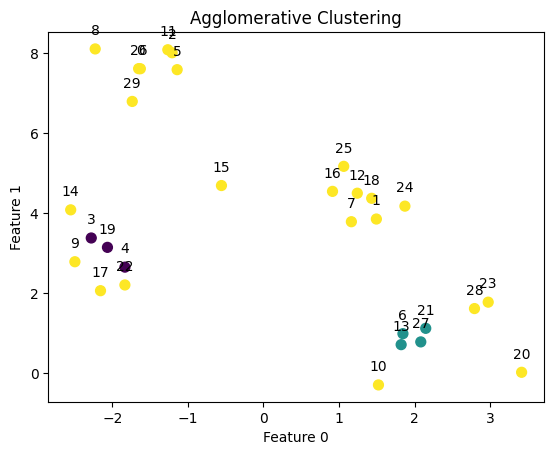

In [3]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.neighbors import kneighbors_graph



# Generate synthetic data
X, labels_true = make_blobs(n_samples=30, centers=4, cluster_std=0.60, random_state=0)

# Create connectivity matrix
connectivity_matrix = kneighbors_graph(X, n_neighbors=30, include_self=True)
# print(connectivity_matrix)

# Print the connectivity matrix
# print(connectivity_matrix)

# Initialize the Agglomerative Clustering model
model = AgglomerativeClustering(n_clusters=10, connectivity=connectivity_matrix, metric='euclidean', linkage='average')

# Fit model to the data
model.fit(X)

# Predict the cluster labels
labels = model.labels_

#  Convert these labels into dict of clusters
clusters = {}
for i, label in enumerate(labels):
    if label in clusters:
        clusters[label].append(i)
    else:
        clusters[label] = [i]
print(clusters)


# Plot the clusters
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Show labels
for i, txt in enumerate(labels):
    plt.annotate(i, (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()